# **Analisis exploratorio**

In [3]:
#Python
import pandas as pd
from scipy.stats import trim_mean
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as mpl
from matplotlib.pyplot import figure
import math

In [ ]:
os.chdir('/content/')

In [6]:
#Python
tabla = pd.read_excel('hoja_ajustada.xlsx')
tabla = tabla.iloc[0:190, :]
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_id               190 non-null    float64
 1   age_at_enrollment      190 non-null    float64
 2   sex                    190 non-null    float64
 3   race_ethnicity         190 non-null    object 
 4   BMI                    183 non-null    float64
 5   smoking_status         189 non-null    object 
 6   pack_years             186 non-null    float64
 7   inhalational_drugs     187 non-null    float64
 8   ivdu                   186 non-null    float64
 9   hivrna                 189 non-null    float64
 10  cd4                    189 non-null    float64
 11  s_cd14                 181 non-null    float64
 12  nadir_cd4              166 non-null    float64
 13  dm                     190 non-null    float64
 14  htn                    190 non-null    float64
 15  anemia

In [7]:
#Se elimina la variable study_id
tabla.drop('study_id', axis = 1, inplace = True)

#for column in tabla.columns.tolist():
 # if tabla[column].dtype == 'object':
#    tabla[column] = tabla[column].str.replace(',', '.')

In [ ]:
tabla.head()

,age_at_enrollment,sex,race_ethnicity,BMI,smoking_status,pack_years,inhalational_drugs,ivdu,hivrna,cd4,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,52.0,1.0,White,31.088385,current smoker,12.75,1.0,0.0,48.0,752.0,...,0.0,0.0,0.539455,1.0,4.121,98.074059,5.234,95.815720,56.681614,0.0
1,54.0,0.0,Black,26.703398,former smoker,15.00,1.0,0.0,166.0,531.0,...,0.0,0.0,0.640531,1.0,1.835,79.418480,2.442,83.966469,70.344826,0.0
2,49.0,1.0,Black,28.098778,never smoker,0.00,1.0,0.0,48.0,93.0,...,0.0,0.0,0.100649,1.0,2.957,81.434204,3.683,81.268524,38.772114,0.0
3,46.0,0.0,Black,35.944660,current smoker,12.00,1.0,0.0,199.0,454.0,...,0.0,0.0,1.282486,2.0,1.997,89.971703,2.310,84.463554,86.626976,1.0
4,47.0,1.0,Black,24.157185,current smoker,12.50,0.0,0.0,268.0,366.0,...,0.0,0.0,0.877698,1.0,3.773,102.894287,4.595,100.766235,50.122868,1.0


In [8]:
continuous_variables = ['BMI','pack_years','s_cd14','cd4_cd8_ratio','post_FEV1', 'post_FVC','FVC_percent_pred','FEV1_percent_pred', 'dlco_percent_pred']
discrete_variables = ['age_at_enrollment', 'hivrna', 'cd4','nadir_cd4']
nom_variables = ['sex','race_ethnicity','smoking_status','dm','htn','anemia','chronic_heart_disease','tb',
                     'pcp','pneu','ART_use','inhalational_drugs','ivdu']
class_var = ['emphysema_severity']

**Imputación de datos perdidos**

In [ ]:
tabla.isna().sum()

age_at_enrollment         0
sex                       0
race_ethnicity            0
BMI                       7
smoking_status            1
pack_years                4
inhalational_drugs        3
ivdu                      4
hivrna                    1
cd4                       1
s_cd14                    9
nadir_cd4                24
dm                        0
htn                       0
anemia                    0
chronic_heart_disease     0
tb                        0
pcp                       0
pneu                      0
cd4_cd8_ratio             0
ART_use                   0
post_FEV1                60
FEV1_percent_pred        13
post_FVC                 60
FVC_percent_pred         13
dlco_percent_pred         9
emphysema_severity       26
dtype: int64

In [9]:
for var in tabla.columns.tolist():
  if tabla[var].isna().sum != 0:
    if var in continuous_variables:
      mean = tabla[var].mean()
      tabla[var].fillna(mean, inplace = True)
    elif var in discrete_variables:
      median = tabla[var].median()
      tabla[var].fillna(median, inplace = True)
    elif var in nom_variables:
      mode = tabla[var].mode()
      tabla[var].fillna(mode, inplace = True)
    elif var == 'emphysema_severity':
      tabla['emphysema_severity'].fillna(0, inplace = True)



In [ ]:
tabla.isna().sum()

age_at_enrollment        0
sex                      0
race_ethnicity           0
BMI                      0
smoking_status           1
pack_years               0
inhalational_drugs       3
ivdu                     4
hivrna                   0
cd4                      0
s_cd14                   0
nadir_cd4                0
dm                       0
htn                      0
anemia                   0
chronic_heart_disease    0
tb                       0
pcp                      0
pneu                     0
cd4_cd8_ratio            0
ART_use                  0
post_FEV1                0
FEV1_percent_pred        0
post_FVC                 0
FVC_percent_pred         0
dlco_percent_pred        0
emphysema_severity       0
dtype: int64

In [10]:
#Se retiran los registros en los que aún existen datos nulos

tabla = tabla.dropna()
tabla.isna().sum()

age_at_enrollment        0
sex                      0
race_ethnicity           0
BMI                      0
smoking_status           0
pack_years               0
inhalational_drugs       0
ivdu                     0
hivrna                   0
cd4                      0
s_cd14                   0
nadir_cd4                0
dm                       0
htn                      0
anemia                   0
chronic_heart_disease    0
tb                       0
pcp                      0
pneu                     0
cd4_cd8_ratio            0
ART_use                  0
post_FEV1                0
FEV1_percent_pred        0
post_FVC                 0
FVC_percent_pred         0
dlco_percent_pred        0
emphysema_severity       0
dtype: int64

In [11]:
#Conversión a enteros de variables numéricas discretas
tabla[discrete_variables+['emphysema_severity']] = tabla[discrete_variables+['emphysema_severity']].astype('int')

 **Frecuencia**

In [ ]:
#python
tabla.groupby('emphysema_severity').size()

emphysema_severity
0    94
1    42
2    28
3    10
4    12
dtype: int64

**Frecuencias porcentuales**

In [ ]:
#Python
tabla.groupby('emphysema_severity').size() / tabla.shape[0]

emphysema_severity
0    0.505376
1    0.225806
2    0.150538
3    0.053763
4    0.064516
dtype: float64

##**Medidas de centralidad**

**media**


In [ ]:
#Media de variables contínuas
tabla[continuous_variables].mean(axis = 0)

BMI                    26.665908
pack_years             24.542430
s_cd14               1735.907451
cd4_cd8_ratio           0.624789
post_FEV1               3.109192
post_FVC                4.136726
FVC_percent_pred       96.355420
FEV1_percent_pred      92.532056
dlco_percent_pred      54.821961
dtype: float64

In [ ]:
#Media de variables discretas
tabla[discrete_variables].mean(axis = 0)

age_at_enrollment      54.048387
hivrna               8704.967742
cd4                   493.473118
nadir_cd4             179.817204
dtype: float64

**Media robusta**

In [ ]:
#Media robusta de las variables contínuas

trm = trim_mean(tabla[continuous_variables], 0.10)

for m,n in zip(continuous_variables, trm):
  print(f"{m:22}  {n:2.5}")


BMI                     26.351
pack_years              21.811
s_cd14                  1711.2
cd4_cd8_ratio           0.56573
post_FEV1               3.0927
post_FVC                4.1111
FVC_percent_pred        96.157
FEV1_percent_pred       93.059
dlco_percent_pred       54.223


In [ ]:
#Media robusta de las variables discretas
trm_d = trim_mean(tabla[discrete_variables], 0.10)
for m,n in zip(discrete_variables, trm_d):
  print(f"{m:22}  {n:2.5}")

age_at_enrollment       54.347
hivrna                  243.95
cd4                     460.59
nadir_cd4               160.09


**Mediana**

In [ ]:
#Mediana de variables contínuas
tabla[continuous_variables].median(axis = 0)

BMI                    26.244411
pack_years             20.750000
s_cd14               1672.040039
cd4_cd8_ratio           0.487987
post_FEV1               3.098369
post_FVC                4.128915
FVC_percent_pred       96.113535
FEV1_percent_pred      92.159997
dlco_percent_pred      53.765146
dtype: float64

In [ ]:
#Mediana de variables discretas
tabla[discrete_variables].median(axis = 0)

age_at_enrollment     55.0
hivrna                48.0
cd4                  446.0
nadir_cd4            154.0
dtype: float64

**Moda**

In [ ]:
#Moda de variables nominales
mode = tabla[nom_variables].mode(axis = 0)

for m,n in zip(mode.columns.tolist(), mode.iloc[0,:]):
  print(f"{m:22} {n}")

sex                    1.0
race_ethnicity         Black
smoking_status         current smoker
dm                     0.0
htn                    1.0
anemia                 0.0
chronic_heart_disease  0.0
tb                     0.0
pcp                    0.0
pneu                   0.0
ART_use                1.0
inhalational_drugs     1.0
ivdu                   0.0


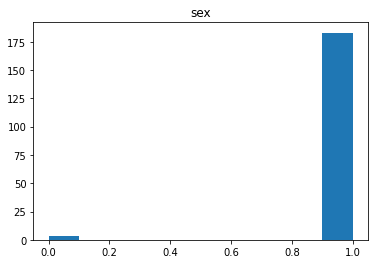

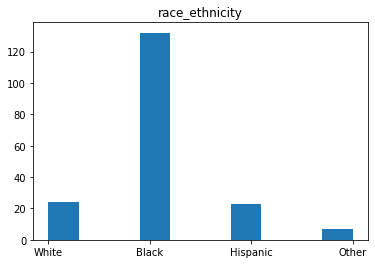

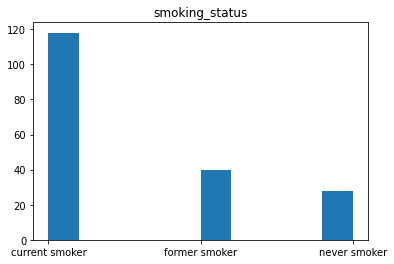

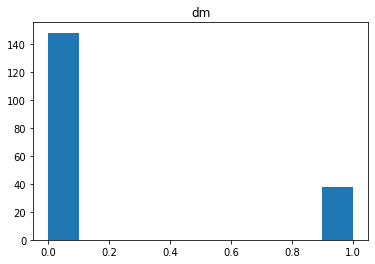

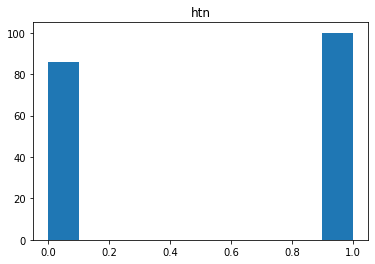

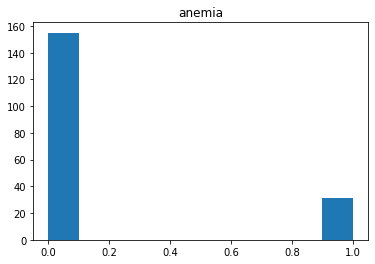

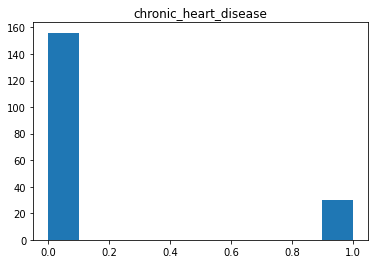

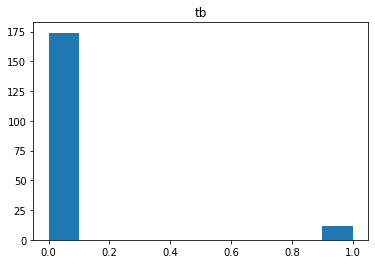

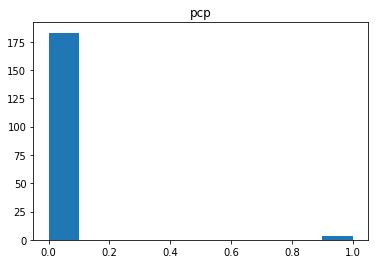

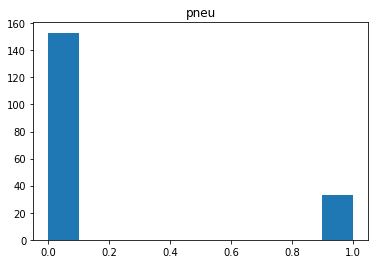

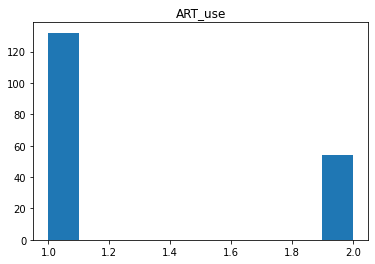

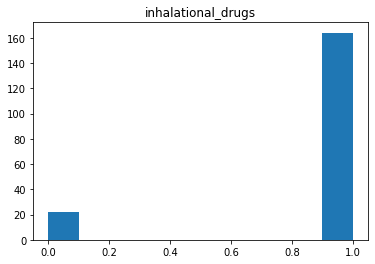

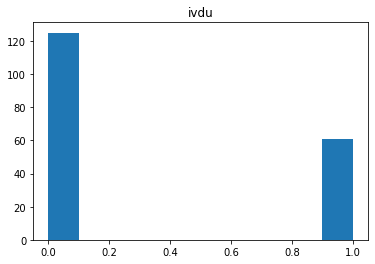

In [ ]:
for n in nom_variables:
  mpl.hist(tabla[n])
  mpl.title(n)
  mpl.show()

**Percentiles**

In [ ]:
#Cuartiles 2,3,4 de variables contínuas
tabla[continuous_variables].describe()

,BMI,pack_years,s_cd14,cd4_cd8_ratio,post_FEV1,post_FVC,FVC_percent_pred,FEV1_percent_pred,dlco_percent_pred
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,26.665908,24.542430,1735.907451,0.624789,3.109192,4.136726,96.355420,92.532056,54.821961
std,4.794556,22.178843,450.110701,0.459121,0.619253,0.697866,15.353372,18.444419,15.248650
min,17.530865,0.000000,50.000000,0.007463,1.512000,2.310000,48.302616,38.680630,18.650078
25%,23.660717,6.850000,1419.999969,0.293785,2.785000,3.766250,87.021708,83.007584,43.924887
50%,26.244411,20.750000,1672.040039,0.487987,3.098369,4.128915,96.113535,92.159997,53.765146
75%,29.210034,38.750000,2039.522522,0.871056,3.398500,4.368000,104.813551,104.498329,63.819578
max,53.159142,118.800003,3045.070068,2.714597,5.303000,6.838000,148.812195,145.167084,103.343552


In [ ]:
#Cuartiles 2,3,4 de variables discretas
tabla[discrete_variables].describe()

,age_at_enrollment,hivrna,cd4,nadir_cd4
count,186.000000,186.000000,186.000000,186.000000
mean,54.048387,8704.967742,493.473118,179.817204
std,7.459644,36476.841032,305.011532,156.638019
min,27.000000,3.000000,4.000000,1.000000
25%,49.000000,48.000000,298.750000,70.000000
50%,55.000000,48.000000,446.000000,154.000000
75%,59.000000,101.750000,626.250000,252.000000
max,69.000000,341000.000000,1962.000000,1235.000000


**Boxplots**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


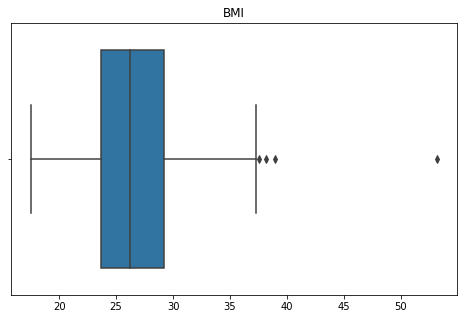

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


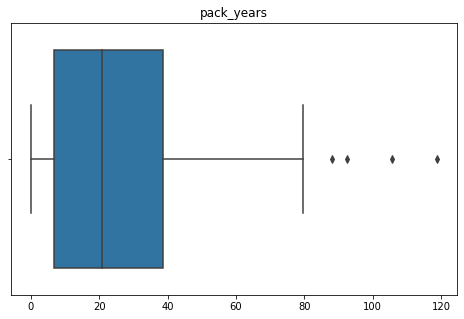

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


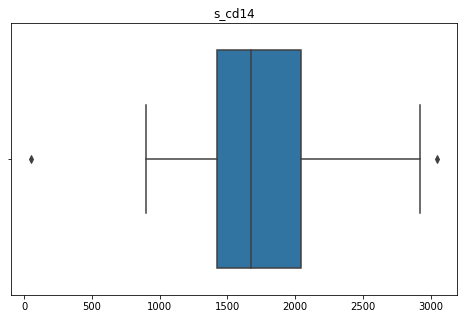

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


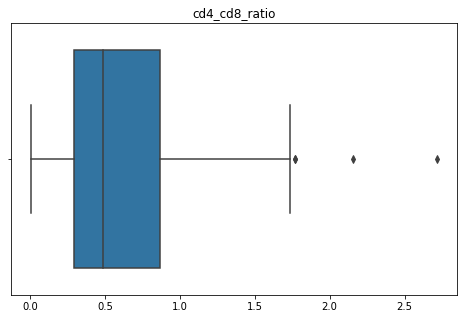

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


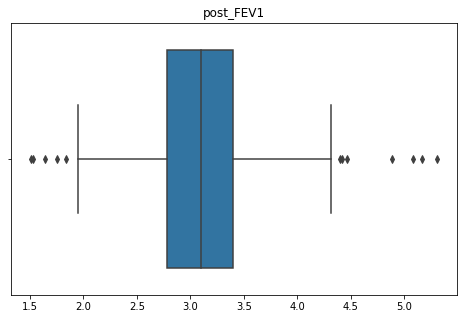

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


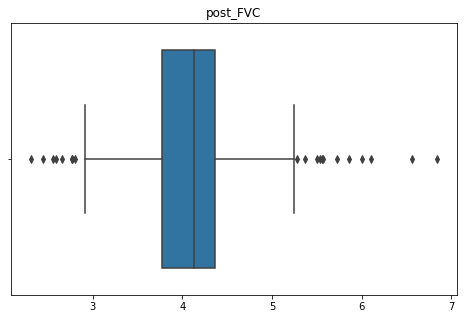

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


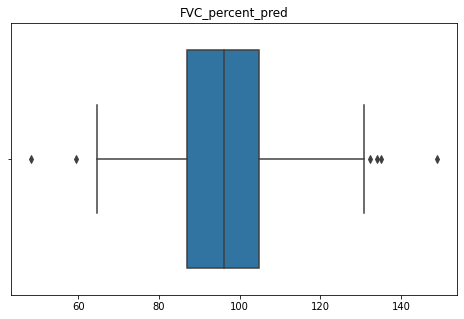

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


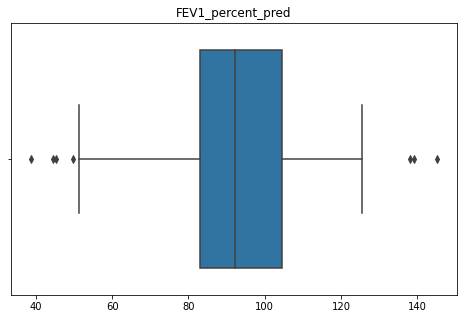

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


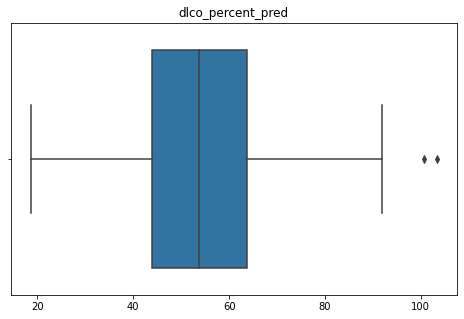

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


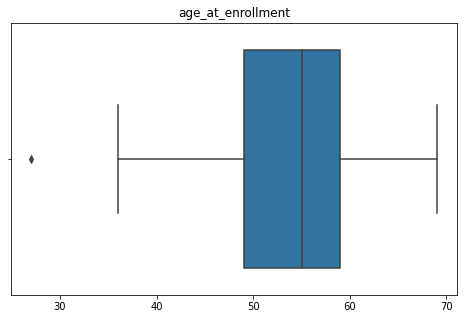

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


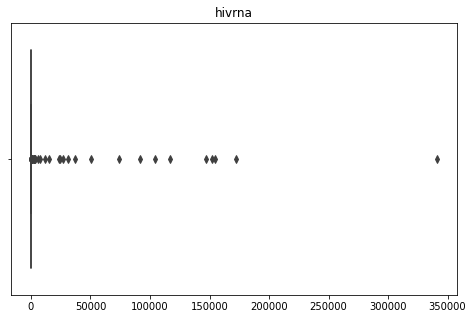

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


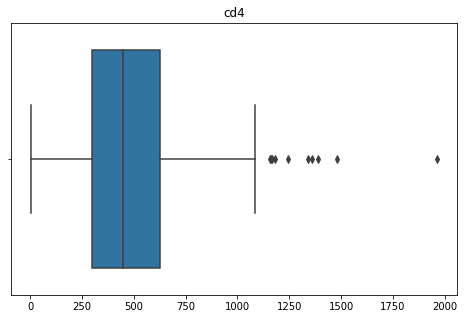

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


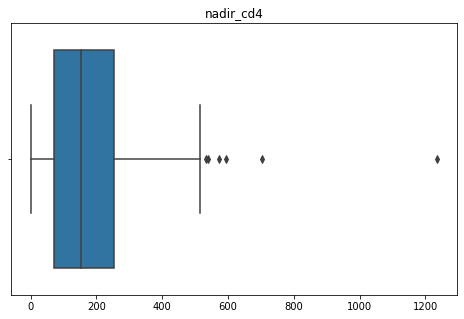

In [ ]:
for var in tabla[continuous_variables + discrete_variables]:
  fig = figure(figsize=(8,5))
  sns.boxplot(tabla[var].values)
  mpl.title(var)
  mpl.show()

##**Medidas de dispersión**

**Rangos**

In [ ]:
#Rangos de variables contínuas y discretas
for column in tabla[continuous_variables].columns.tolist():
    print(f"{column:18} {tabla[column].min():8.4} - {tabla[column].max():.4}")

BMI                   17.53 - 53.16
pack_years              0.0 - 118.8
s_cd14                 50.0 - 3.045e+03
cd4_cd8_ratio      0.007463 - 2.715
post_FEV1             1.512 - 5.303
post_FVC               2.31 - 6.838
FVC_percent_pred       48.3 - 148.8
FEV1_percent_pred     38.68 - 145.2
dlco_percent_pred     18.65 - 103.3


In [ ]:
for column in tabla[discrete_variables].columns.tolist():
    print(f"{column:18} {tabla[column].min():8} - {tabla[column].max():}")

age_at_enrollment        27 - 69
hivrna                    3 - 341000
cd4                       4 - 1962
nadir_cd4                 1 - 1235


**Desviación estándar**

In [ ]:
#Desviaciones estándar para variables contínuas y discretas
for column in tabla[continuous_variables + discrete_variables].columns.tolist():
    print(f"{column:22} {tabla[column].std():.5}")


BMI                    4.7946
pack_years             22.179
s_cd14                 450.11
cd4_cd8_ratio          0.45912
post_FEV1              0.61925
post_FVC               0.69787
FVC_percent_pred       15.353
FEV1_percent_pred      18.444
dlco_percent_pred      15.249
age_at_enrollment      7.4596
hivrna                 3.6477e+04
cd4                    305.01
nadir_cd4              156.64


**Desv. media absoluta**

In [ ]:

import statistics

def aad(x):
  a = (abs(x - x.median())).mean()
  return a

for column in tabla[continuous_variables+discrete_variables].columns.tolist():
    print(f"{column:22}{aad(tabla[column]):.5}")


BMI                   3.5604
pack_years            17.202
s_cd14                346.69
cd4_cd8_ratio         0.33552
post_FEV1             0.41063
post_FVC              0.44726
FVC_percent_pred      11.428
FEV1_percent_pred     13.967
dlco_percent_pred     11.788
age_at_enrollment     5.9731
hivrna                8663.0
cd4                   219.28
nadir_cd4             107.13


##**Estadísticas multivariadas**

**covarianza**

In [74]:
#Python
cov = tabla[continuous_variables+discrete_variables].cov()
cov


,BMI,pack_years,s_cd14,cd4_cd8_ratio,post_FEV1,post_FVC,FVC_percent_pred,FEV1_percent_pred,dlco_percent_pred,age_at_enrollment,hivrna,cd4,nadir_cd4
BMI,22.987770,-4.907925,-462.481437,-0.245862,-0.071187,-0.493395,-14.669439,-0.864782,15.167420,-4.493439,-1.149638e+04,-3.778727e+01,-13.484485
pack_years,-4.907925,491.901096,337.715754,0.244893,-2.802076,-0.935506,-13.526504,-85.482576,-45.281766,60.612173,6.085740e+04,-2.151472e+02,199.872846
s_cd14,-462.481437,337.715754,202599.643371,14.642591,-26.729726,17.979315,-114.549519,-1234.699444,-923.174085,856.220140,6.889171e+05,5.926831e+03,-2671.427755
cd4_cd8_ratio,-0.245862,0.244893,14.642591,0.210793,0.019410,0.017670,0.284308,0.771901,1.775560,0.203949,-3.113106e+03,8.814981e+01,28.050187
post_FEV1,-0.071187,-2.802076,-26.729726,0.019410,0.383475,0.360569,5.107126,7.758469,3.235666,-1.450364,-8.391553e+02,1.555292e+01,4.338096
post_FVC,-0.493395,-0.935506,17.979315,0.017670,0.360569,0.487016,6.856096,6.251704,2.181493,-0.856215,6.869259e+02,9.415926e+00,-1.052684
FVC_percent_pred,-14.669439,-13.526504,-114.549519,0.284308,5.107126,6.856096,235.726021,215.990153,37.342996,-14.176630,5.558555e+03,1.542084e+02,-47.832651
FEV1_percent_pred,-0.864782,-85.482576,-1234.699444,0.771901,7.758469,6.251704,215.990153,340.196603,114.645111,-30.811659,-4.917515e+04,6.600384e+02,134.331240
dlco_percent_pred,15.167420,-45.281766,-923.174085,1.775560,3.235666,2.181493,37.342996,114.645111,232.521338,-22.674258,-6.198880e+04,9.904990e+02,215.673354
age_at_enrollment,-4.493439,60.612173,856.220140,0.203949,-1.450364,-0.856215,-14.176630,-30.811659,-22.674258,55.646295,-1.994052e+04,-1.496987e+02,-54.931648


In [76]:
cov.to_excel('covar_matrix.xlsx')

**Correlación**

In [ ]:
tabla[continuous_variables+discrete_variables].corr()

,BMI,pack_years,s_cd14,cd4_cd8_ratio,post_FEV1,post_FVC,FVC_percent_pred,FEV1_percent_pred,dlco_percent_pred,age_at_enrollment,hivrna,cd4,nadir_cd4
BMI,1.000000,-0.046154,-0.214302,-0.111690,-0.023976,-0.147460,-0.199279,-0.009779,0.207459,-0.125635,-0.065735,-0.025839,-0.017955
pack_years,-0.046154,1.000000,0.033829,0.024050,-0.204020,-0.060442,-0.039723,-0.208965,-0.133892,0.366356,0.075224,-0.031804,0.057533
s_cd14,-0.214302,0.033829,1.000000,0.070855,-0.095897,0.057238,-0.016576,-0.148723,-0.134503,0.255005,0.041960,0.043170,-0.037890
cd4_cd8_ratio,-0.111690,0.024050,0.070855,1.000000,0.068271,0.055149,0.040333,0.091153,0.253616,0.059549,-0.185887,0.629474,0.390042
post_FEV1,-0.023976,-0.204020,-0.095897,0.068271,1.000000,0.834350,0.537161,0.679270,0.342660,-0.313972,-0.037150,0.082343,0.044723
post_FVC,-0.147460,-0.060442,0.057238,0.055149,0.834350,1.000000,0.639884,0.485693,0.204999,-0.164472,0.026985,0.044236,-0.009630
FVC_percent_pred,-0.199279,-0.039723,-0.016576,0.040333,0.537161,0.639884,1.000000,0.762720,0.159505,-0.123780,0.009925,0.032930,-0.019889
FEV1_percent_pred,-0.009779,-0.208965,-0.148723,0.091153,0.679270,0.485693,0.762720,1.000000,0.407623,-0.223940,-0.073091,0.117324,0.046496
dlco_percent_pred,0.207459,-0.133892,-0.134503,0.253616,0.342660,0.204999,0.159505,0.407623,1.000000,-0.199335,-0.111446,0.212964,0.090296
age_at_enrollment,-0.125635,0.366356,0.255005,0.059549,-0.313972,-0.164472,-0.123780,-0.223940,-0.199335,1.000000,-0.073283,-0.065794,-0.047012


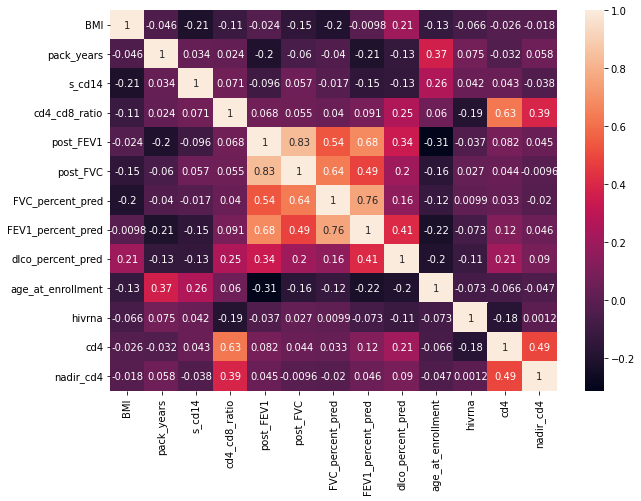

In [ ]:
#Heatmap de correlación
figure(figsize=(10,7))
sns.heatmap(tabla[continuous_variables+discrete_variables].corr(), annot=True)
mpl.savefig('heatmap.png')

**Tablas de contingencia**

##**Histogramas**

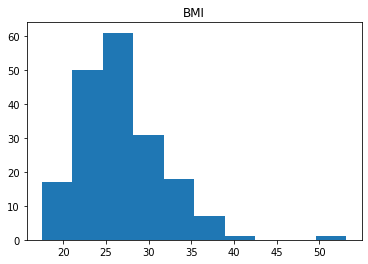

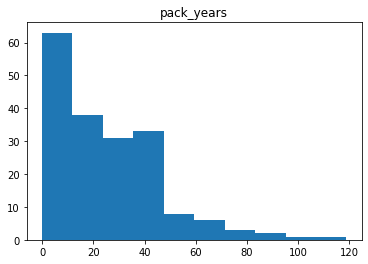

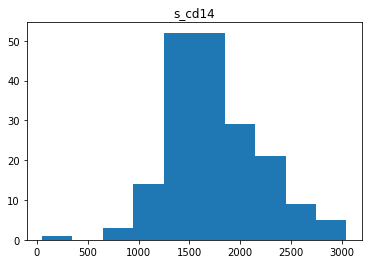

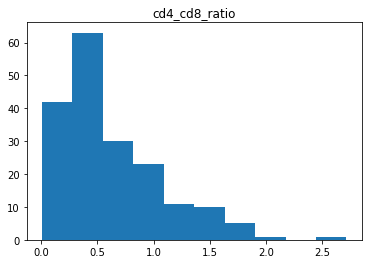

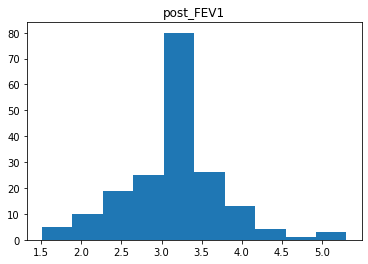

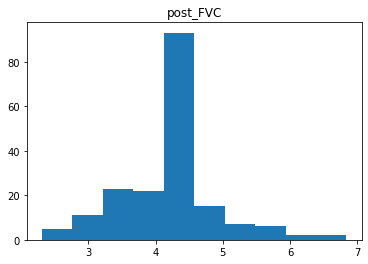

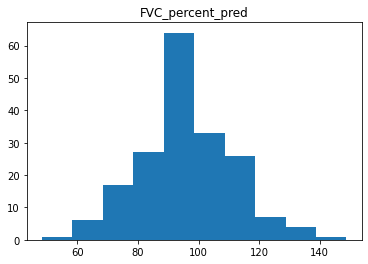

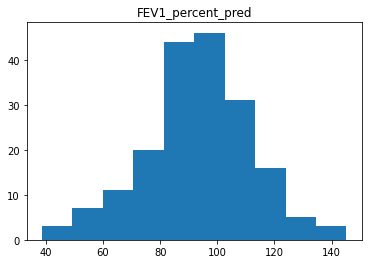

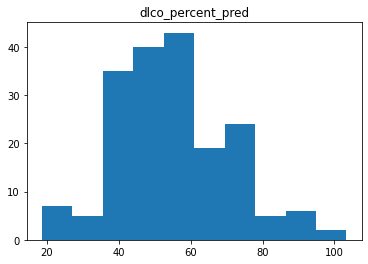

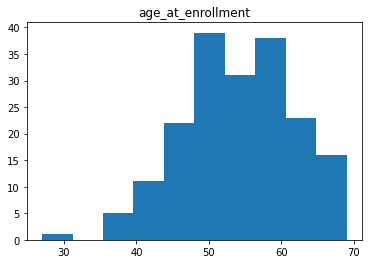

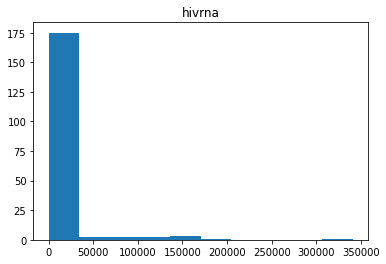

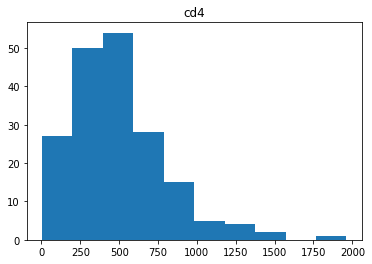

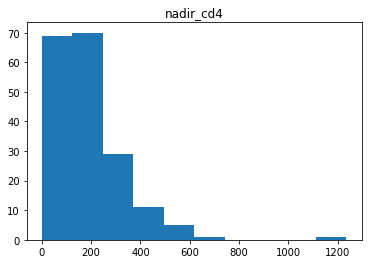

In [ ]:
for var in continuous_variables+discrete_variables:
  mpl.hist(tabla[var], bins = 10)
  mpl.title(var)
  mpl.show()

**Estimación de densidad**

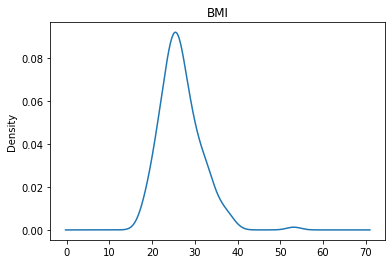

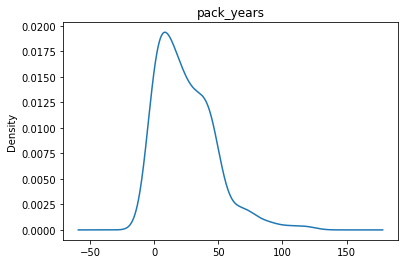

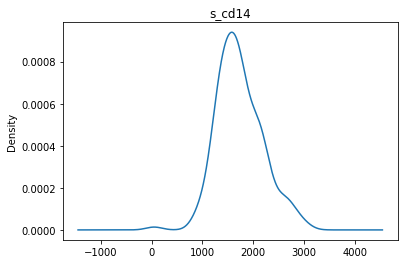

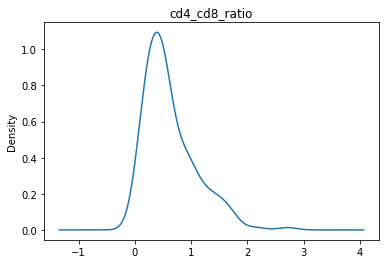

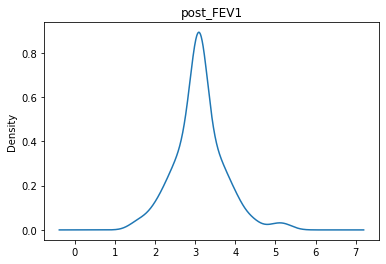

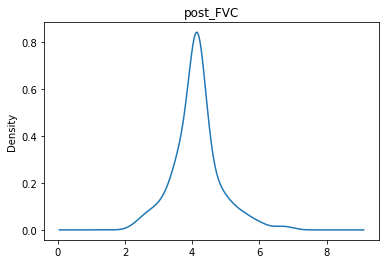

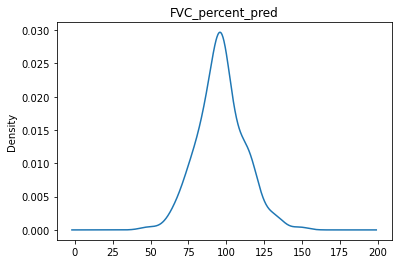

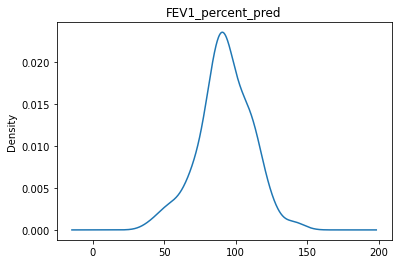

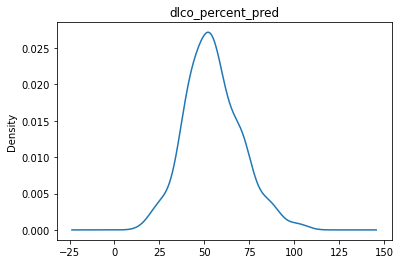

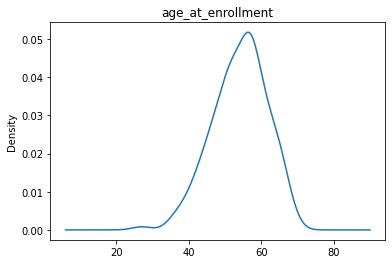

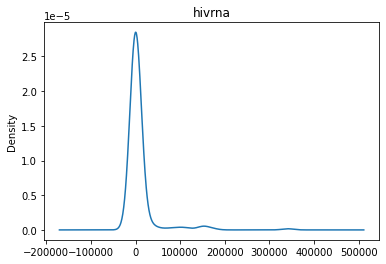

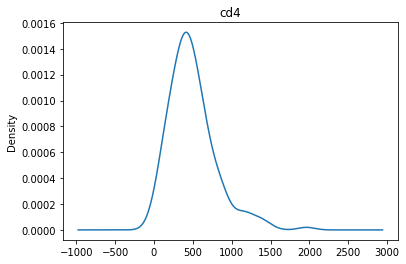

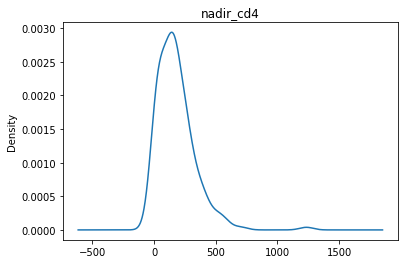

In [ ]:
for var in continuous_variables+discrete_variables:
  tabla[var].plot.kde()
  mpl.title(var)
  mpl.show()


In [ ]:
colors = {0:'b',1:'g',2:'y',3:'r',4:'purple'}

def scatter_plot(var):
  for clase in range(5):
    mpl.scatter(tabla[var][tabla['emphysema_severity'] == clase],
              tabla['cd4_cd8_ratio'][tabla['emphysema_severity'] == clase], color = colors[clase])
  mpl.title(var)
  mpl.xlabel(var)
  mpl.ylabel('cd4_cd8_ratio')
  mpl.legend(colors)
  mpl.show()

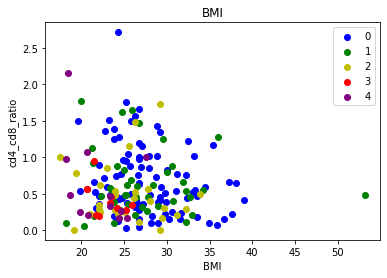

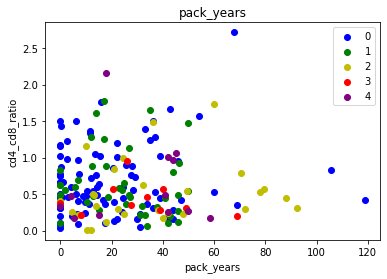

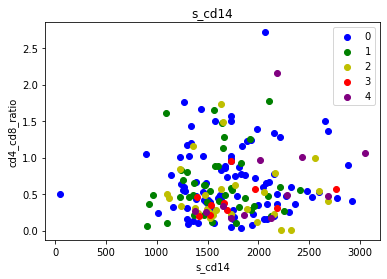

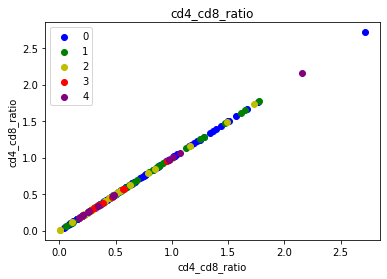

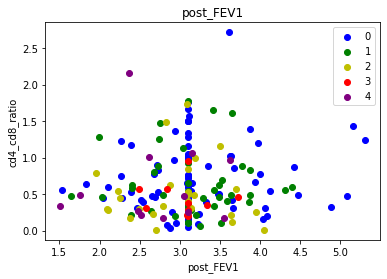

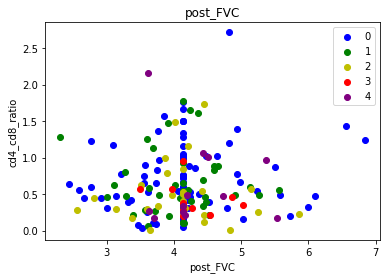

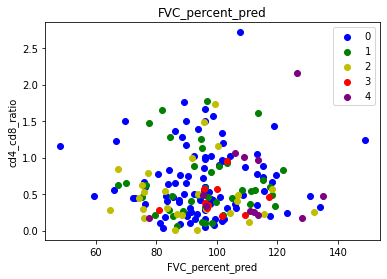

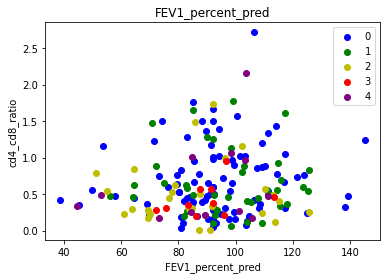

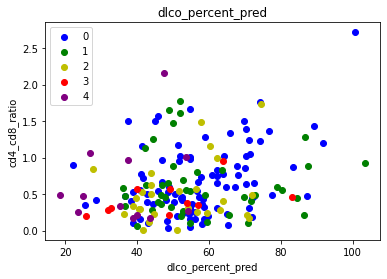

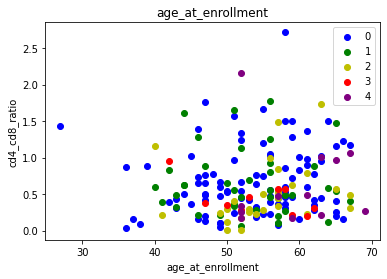

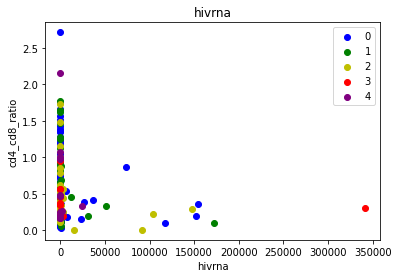

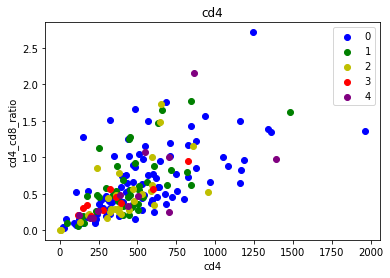

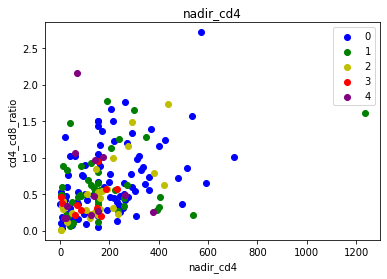

In [ ]:
for var in continuous_variables+discrete_variables:
  scatter_plot(var)

#**PREPROCESAMIENTO**

##**Detección de outliers**

In [15]:
def outliers(var):
  outs = []
  mean = var.mean()
  median = var.median()
  std = var.std()
  for n in list(var.values):
    if median - (3*std) < n <= median + (3*std):
      continue
    else:
      outs.append(n)
  if len(outs) != 0:
    print(f"{var.name:18} =  {len(outs)}")


In [16]:
outliers(tabla['hivrna'])

hivrna             =  6


In [17]:
for var in continuous_variables + discrete_variables:
  outliers(tabla[var])

BMI                =  1
pack_years         =  4
s_cd14             =  2
cd4_cd8_ratio      =  2
post_FEV1          =  3
post_FVC           =  2
FVC_percent_pred   =  2
dlco_percent_pred  =  2
age_at_enrollment  =  1
hivrna             =  6
cd4                =  3
nadir_cd4          =  2



##**Normalización**

**Z-score**

In [65]:
#Normalización Z-score usando la desviación estándar
z_tabla = tabla.copy()
for var in continuous_variables + discrete_variables:
  z_tabla[var] = (z_tabla[var] - z_tabla[var].mean()) / z_tabla[var].std()
z_tabla.head()

,age_at_enrollment,sex,race_ethnicity,BMI,smoking_status,pack_years,inhalational_drugs,ivdu,hivrna,cd4,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,-0.274596,1.0,White,0.922395,current smoker,-0.531697,1.0,0.0,-0.237328,0.847597,...,0.0,0.0,-0.185863,1.0,1.633915,0.300470,1.572329,-0.035152,0.121955,0
1,-0.006487,0.0,Black,0.007819,former smoker,-0.430249,1.0,0.0,-0.234093,0.123034,...,0.0,0.0,0.034287,1.0,-2.057626,-0.710978,-2.428442,-0.806921,1.017983,0
2,-0.676760,1.0,Black,0.298853,never smoker,-1.106569,1.0,0.0,-0.237328,-1.312977,...,0.0,0.0,-1.141614,1.0,-0.245767,-0.601692,-0.650162,-0.982644,-1.052542,0
3,-1.078924,0.0,Black,1.935268,current smoker,-0.565513,1.0,0.0,-0.233188,-0.129415,...,0.0,0.0,1.432512,2.0,-1.796021,-0.138815,-2.617590,-0.774544,2.085759,1
4,-0.944869,1.0,Black,-0.523244,current smoker,-0.542969,0.0,0.0,-0.231297,-0.417929,...,0.0,0.0,0.550854,1.0,1.071948,0.561808,0.656679,0.287286,-0.308165,1


In [21]:
#Rangos Z-score
for column in z_tabla[continuous_variables + discrete_variables].columns.tolist():
    print(f"{column:18} {z_tabla[column].min():8.4} / {z_tabla[column].max():.4}")

BMI                  -1.905 / 5.526
pack_years           -1.107 / 4.25
s_cd14               -3.746 / 2.909
cd4_cd8_ratio        -1.345 / 4.552
post_FEV1            -2.579 / 3.543
post_FVC             -2.618 / 3.871
FVC_percent_pred      -3.13 / 3.417
FEV1_percent_pred     -2.92 / 2.854
dlco_percent_pred    -2.372 / 3.182
age_at_enrollment    -3.626 / 2.004
hivrna              -0.2386 / 9.11
cd4                  -1.605 / 4.815
nadir_cd4            -1.142 / 6.736


**Min -Max**

In [12]:
min_max_tabla = tabla.copy()
for var in continuous_variables + discrete_variables:
  min_max_tabla[var] = (min_max_tabla[var] - min_max_tabla[var].min()) / (min_max_tabla[var].max() - min_max_tabla[var].min())
min_max_tabla.head()

,age_at_enrollment,sex,race_ethnicity,BMI,smoking_status,pack_years,inhalational_drugs,ivdu,hivrna,cd4,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,0.595238,1.0,White,0.380527,current smoker,0.107323,1.0,0.0,0.000132,0.382022,...,0.0,0.0,0.196515,1.0,0.688209,0.557756,0.645760,0.472722,0.449049,0
1,0.642857,0.0,Black,0.257451,former smoker,0.126263,1.0,0.0,0.000478,0.269152,...,0.0,0.0,0.233852,1.0,0.085202,0.382564,0.029152,0.354830,0.610375,0
2,0.523810,1.0,Black,0.296616,never smoker,0.000000,1.0,0.0,0.000132,0.045455,...,0.0,0.0,0.034423,1.0,0.381166,0.401493,0.303224,0.327988,0.237587,0
3,0.452381,0.0,Black,0.516831,current smoker,0.101010,1.0,0.0,0.000575,0.229826,...,0.0,0.0,0.470986,2.0,0.127935,0.481668,0.000000,0.359776,0.802623,1
4,0.476190,1.0,Black,0.185985,current smoker,0.105219,0.0,0.0,0.000777,0.184883,...,0.0,0.0,0.321460,1.0,0.596413,0.603022,0.504638,0.521976,0.371608,1


In [13]:
#Rangos Min_Max
for column in min_max_tabla[continuous_variables + discrete_variables].columns.tolist():
    print(f"{column:18} {min_max_tabla[column].min():8.4} / {min_max_tabla[column].max():.4}")

BMI                     0.0 / 1.0
pack_years              0.0 / 1.0
s_cd14                  0.0 / 1.0
cd4_cd8_ratio           0.0 / 1.0
post_FEV1               0.0 / 1.0
post_FVC                0.0 / 1.0
FVC_percent_pred        0.0 / 1.0
FEV1_percent_pred       0.0 / 1.0
dlco_percent_pred       0.0 / 1.0
age_at_enrollment       0.0 / 1.0
hivrna                  0.0 / 1.0
cd4                     0.0 / 1.0
nadir_cd4               0.0 / 1.0


**Conversión de variables categóricas**

In [14]:
nom_str_var = ['race_ethnicity','smoking_status'] 
for n in nom_str_var:
  print(min_max_tabla[n].value_counts())

Black       132
White        24
Hispanic     23
Other         7
Name: race_ethnicity, dtype: int64
current smoker    118
former smoker      40
never smoker       28
Name: smoking_status, dtype: int64


In [15]:
#Obtención de dummies y eliminación de las variables categóricas nominales en el dataframe
dummies = pd.get_dummies(min_max_tabla[nom_str_var])
min_max_tabla.drop(nom_str_var, axis=1, inplace = True)

In [16]:
for n in range(len(dummies.columns.tolist())):
  nombre = dummies.columns.tolist()[n]
  min_max_tabla.insert(n + 2, nombre, dummies[nombre])

min_max_tabla.head()

,age_at_enrollment,sex,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Other,race_ethnicity_White,smoking_status_current smoker,smoking_status_former smoker,smoking_status_never smoker,BMI,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,0.595238,1.0,0,0,0,1,1,0,0,0.380527,...,0.0,0.0,0.196515,1.0,0.688209,0.557756,0.645760,0.472722,0.449049,0
1,0.642857,0.0,1,0,0,0,0,1,0,0.257451,...,0.0,0.0,0.233852,1.0,0.085202,0.382564,0.029152,0.354830,0.610375,0
2,0.523810,1.0,1,0,0,0,0,0,1,0.296616,...,0.0,0.0,0.034423,1.0,0.381166,0.401493,0.303224,0.327988,0.237587,0
3,0.452381,0.0,1,0,0,0,1,0,0,0.516831,...,0.0,0.0,0.470986,2.0,0.127935,0.481668,0.000000,0.359776,0.802623,1
4,0.476190,1.0,1,0,0,0,1,0,0,0.185985,...,0.0,0.0,0.321460,1.0,0.596413,0.603022,0.504638,0.521976,0.371608,1


In [17]:
#Rangos nuevas variables nominales numéricas.
for column in np.arange(2,9):
    print(f"{min_max_tabla.columns.tolist()[column]:22} {min_max_tabla.iloc[:,column].min()} / {min_max_tabla.iloc[:,column].max()}")

race_ethnicity_Black   0 / 1
race_ethnicity_Hispanic 0 / 1
race_ethnicity_Other   0 / 1
race_ethnicity_White   0 / 1
smoking_status_current smoker 0 / 1
smoking_status_former smoker 0 / 1
smoking_status_never smoker 0 / 1


In [18]:
min_max_tabla[['sex','dm','htn','anemia','chronic_heart_disease','tb','pcp','pneu','ART_use','inhalational_drugs','ivdu']] = min_max_tabla[['sex','dm','htn','anemia','chronic_heart_disease','tb',
                     'pcp','pneu','ART_use','inhalational_drugs','ivdu']].astype('int')

In [19]:
min_max_tabla.head()

,age_at_enrollment,sex,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Other,race_ethnicity_White,smoking_status_current smoker,smoking_status_former smoker,smoking_status_never smoker,BMI,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,0.595238,1,0,0,0,1,1,0,0,0.380527,...,0,0,0.196515,1,0.688209,0.557756,0.645760,0.472722,0.449049,0
1,0.642857,0,1,0,0,0,0,1,0,0.257451,...,0,0,0.233852,1,0.085202,0.382564,0.029152,0.354830,0.610375,0
2,0.523810,1,1,0,0,0,0,0,1,0.296616,...,0,0,0.034423,1,0.381166,0.401493,0.303224,0.327988,0.237587,0
3,0.452381,0,1,0,0,0,1,0,0,0.516831,...,0,0,0.470986,2,0.127935,0.481668,0.000000,0.359776,0.802623,1
4,0.476190,1,1,0,0,0,1,0,0,0.185985,...,0,0,0.321460,1,0.596413,0.603022,0.504638,0.521976,0.371608,1


##**Selección de características**

**Por desv. estándar y media**

In [20]:
def select(data, target, threshold):
    #Obtener el número de clases
    print(f'Variables a eliminar, threshold = {threshold}')
    n_clases = data.groupby(target)[target].size().size
    for var in data.columns.tolist():
      if len(data[var].value_counts().keys()) <= 2:
        continue
      if data[var].dtype == 'category':
        continue
      medias = []
      SE = 0
      mean_dif = 0
      for n in range(n_clases):
        clase = data.groupby(target)[target].size().keys()[n]
        d = data[var][data[target] == clase]
        n = d.shape[0]
        media = d.mean()
        medias.append(media)
        vari = d.var()
        SE += vari/n
      mean_dif = medias[0]
      for med in range(1, len(medias)):
        mean_dif -= medias[med]
      valor = abs(mean_dif)/SE
      if valor < threshold:
        print(var,'=', valor)

In [21]:
select(min_max_tabla, target = 'emphysema_severity', threshold = 20)

Variables a eliminar, threshold = 20
hivrna = 13.759489722203133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


In [22]:
#Eliminación d e variable hivrna
min_max_tabla.drop('hivrna', axis = 1, inplace = True)

##**Por entropía**

Conversión de toda la tabla a variables categóricas

**Discretización**

In [23]:
#n_clases

for column in min_max_tabla.columns.tolist():
    print(f"{column} {min_max_tabla[column].value_counts().shape[0]}")

age_at_enrollment 34
sex 2
race_ethnicity_Black 2
race_ethnicity_Hispanic 2
race_ethnicity_Other 2
race_ethnicity_White 2
smoking_status_current smoker 2
smoking_status_former smoker 2
smoking_status_never smoker 2
BMI 168
pack_years 108
inhalational_drugs 2
ivdu 2
cd4 163
s_cd14 178
nadir_cd4 122
dm 2
htn 2
anemia 2
chronic_heart_disease 2
tb 2
pcp 2
pneu 2
cd4_cd8_ratio 186
ART_use 2
post_FEV1 126
FEV1_percent_pred 175
post_FVC 126
FVC_percent_pred 175
dlco_percent_pred 180
emphysema_severity 5


In [24]:
#Creación de lista de variables no binarias
no_binarias = []
for column in min_max_tabla.columns.tolist():
  if min_max_tabla[column].dtype == 'category':
    continue
  elif column == 'emphysema_severity':
    continue
  elif min_max_tabla[column].value_counts().shape[0] != 2:
    no_binarias.append(column)

no_binarias


['age_at_enrollment',
 'BMI',
 'pack_years',
 'cd4',
 's_cd14',
 'nadir_cd4',
 'cd4_cd8_ratio',
 'post_FEV1',
 'FEV1_percent_pred',
 'post_FVC',
 'FVC_percent_pred',
 'dlco_percent_pred']

In [ ]:
min_max_tabla.head()

,age_at_enrollment,sex,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Other,race_ethnicity_White,smoking_status_current smoker,smoking_status_former smoker,smoking_status_never smoker,BMI,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,0.595238,1,0,0,0,1,1,0,0,0.380527,...,0,0,0.196515,1,0.688209,0.557756,0.645760,0.472722,0.449049,0
1,0.642857,0,1,0,0,0,0,1,0,0.257451,...,0,0,0.233852,1,0.085202,0.382564,0.029152,0.354830,0.610375,0
2,0.523810,1,1,0,0,0,0,0,1,0.296616,...,0,0,0.034423,1,0.381166,0.401493,0.303224,0.327988,0.237587,0
3,0.452381,0,1,0,0,0,1,0,0,0.516831,...,0,0,0.470986,2,0.127935,0.481668,0.000000,0.359776,0.802623,1
4,0.476190,1,1,0,0,0,1,0,0,0.185985,...,0,0,0.321460,1,0.596413,0.603022,0.504638,0.521976,0.371608,1


In [26]:
for n in no_binarias:
  min_max_tabla[n] = pd.qcut(min_max_tabla[n], 4, labels = [1,2,3,4])
  print(n)

age_at_enrollment
BMI
pack_years
cd4
s_cd14
nadir_cd4
cd4_cd8_ratio
post_FEV1
FEV1_percent_pred
post_FVC
FVC_percent_pred
dlco_percent_pred


In [30]:
#Rangos de variables contínuas y discretas
for column in min_max_tabla[no_binarias].columns.tolist():
    print(f"{column:18} {min_max_tabla[column].min():8} - {min_max_tabla[column].max():}")

age_at_enrollment         1 - 4
BMI                       1 - 4
pack_years                1 - 4
cd4                       1 - 4
s_cd14                    1 - 4
nadir_cd4                 1 - 4
cd4_cd8_ratio             1 - 4
post_FEV1                 1 - 4
FEV1_percent_pred         1 - 4
post_FVC                  1 - 4
FVC_percent_pred          1 - 4
dlco_percent_pred         1 - 4


In [ ]:
for column in min_max_tabla.columns.tolist():
    print(f"{column} {min_max_tabla[column].value_counts().shape[0]}")

age_at_enrollment 4
sex 2
race_ethnicity_Black 2
race_ethnicity_Hispanic 2
race_ethnicity_Other 2
race_ethnicity_White 2
smoking_status_current smoker 2
smoking_status_former smoker 2
smoking_status_never smoker 2
BMI 4
pack_years 4
inhalational_drugs 2
ivdu 2
cd4 4
s_cd14 4
nadir_cd4 4
dm 2
htn 2
anemia 2
chronic_heart_disease 2
tb 2
pcp 2
pneu 2
cd4_cd8_ratio 4
ART_use 2
post_FEV1 4
FEV1_percent_pred 4
post_FVC 4
FVC_percent_pred 4
dlco_percent_pred 4
emphysema_severity 5


In [41]:
def sim_matriz(data):
  """Crea matriz de similaridad"""
  matriz = np.zeros(data.shape[0]**2).reshape(data.shape[0], data.shape[0])
  for f in np.arange(data.shape[0]):
    for f2 in np.arange(data.shape[0]):
      en_comun = 0
      for col in np.arange(data.shape[1]):
        if data.iloc[f, col] == data.iloc[f2, col]:
          en_comun += 1
        else:
          continue 
      matriz[f, f2] = en_comun / data.shape[1]
  return matriz

In [42]:
def entropia(data):
  """Calcula la entropía"""
  entropia = 0
  for col in np.arange(data.shape[0]):
    for fila in np.arange(col):
      sim = data[col, fila]
      if sim == 0 or sim == 1:
        continue
      entropia += -((sim * math.log(sim,10)) + ((1-sim) * math.log(1-sim, 10)))
  return entropia

In [55]:
def ranking(data):
  """Crea el ranking de variables a eliminar de acuerdo al cálculo de la entropía
  Retorna diccionario con las diferencias de la entropía original menos la entropía resultante
  eliminando cada variable  DE MENOR A MAYOR"""

  entro_data = entropia(sim_matriz(data))
  ranking = {}
  for col in np.arange(data.shape[1]):
    col_nombre = data.columns.tolist()[col]
    dropped = data.drop(col_nombre, axis = 1, inplace = False)
    sim = sim_matriz(dropped)
    entro = entropia(sim)
    ranking[col_nombre] =  entro_data - entro
  #Organizar el ranking
  sorted_ranking = {}
  sorted_values = sorted(ranking.values())
  for val in sorted_values:
    for key in ranking.keys():
      if ranking[key] == val:
        sorted_ranking[key] = val
        continue
  return sorted_ranking.keys()

In [56]:
ranking(min_max_tabla.iloc[:,:-1])

dict_keys(['race_ethnicity_White', 'race_ethnicity_Black', 'race_ethnicity_Other', 'smoking_status_former smoker', 'pcp', 'chronic_heart_disease', 'anemia', 'sex', 'smoking_status_never smoker', 'tb', 'race_ethnicity_Hispanic', 'inhalational_drugs', 'dm', 'smoking_status_current smoker', 'pneu', 'ivdu', 'ART_use', 'htn', 'post_FEV1', 'post_FVC', 'FEV1_percent_pred', 'pack_years', 'FVC_percent_pred', 'age_at_enrollment', 'cd4', 'dlco_percent_pred', 'cd4_cd8_ratio', 'nadir_cd4', 'BMI', 's_cd14'])

In [71]:
rank = ['race_ethnicity_White', 'race_ethnicity_Black', 'race_ethnicity_Other', 'smoking_status_former smoker', 'pcp', 'chronic_heart_disease', 'anemia', 'sex', 'smoking_status_never smoker', 'tb', 'race_ethnicity_Hispanic', 'inhalational_drugs', 'dm', 'smoking_status_current smoker', 'pneu', 'ivdu', 'ART_use', 'htn', 'post_FEV1', 'post_FVC', 'FEV1_percent_pred', 'pack_years', 'FVC_percent_pred', 'age_at_enrollment', 'cd4', 'dlco_percent_pred', 'cd4_cd8_ratio', 'nadir_cd4', 'BMI', 's_cd14']

for n in reversed(rank):
  print(n)

s_cd14
BMI
nadir_cd4
cd4_cd8_ratio
dlco_percent_pred
cd4
age_at_enrollment
FVC_percent_pred
pack_years
FEV1_percent_pred
post_FVC
post_FEV1
htn
ART_use
ivdu
pneu
smoking_status_current smoker
dm
inhalational_drugs
race_ethnicity_Hispanic
tb
smoking_status_never smoker
sex
anemia
chronic_heart_disease
pcp
smoking_status_former smoker
race_ethnicity_Other
race_ethnicity_Black
race_ethnicity_White


**PCA**

In [61]:
min_max_tabla.head()

,age_at_enrollment,sex,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Other,race_ethnicity_White,smoking_status_current smoker,smoking_status_former smoker,smoking_status_never smoker,BMI,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,2,1,0,0,0,1,1,0,0,4,...,0,0,3,1,4,3,4,2,3,0
1,2,0,1,0,0,0,0,1,0,3,...,0,0,3,1,1,1,1,1,4,0
2,1,1,1,0,0,0,0,0,1,3,...,0,0,1,1,2,1,1,1,1,0
3,1,0,1,0,0,0,1,0,0,4,...,0,0,4,2,1,2,1,1,4,1
4,1,1,1,0,0,0,1,0,0,2,...,0,0,4,1,4,3,4,3,2,1


In [72]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 5)
transformed = pca.fit_transform(min_max_tabla)
transformed = pd.DataFrame(transformed, columns = ['X1','X2','X3','X4','X5'])

In [73]:
transformed

,X1,X2,X3,X4,X5
0,2.428261,-1.700667,0.908549,0.605008,1.454771
1,-1.094896,-3.294335,-0.687007,-0.107035,-1.320833
2,-2.089810,-0.350676,-3.588236,-1.711660,0.393500
3,-0.426941,-3.263544,-0.278010,-0.309256,-1.281901
4,2.306593,0.826305,-0.120680,-1.053720,-0.146248
...,...,...,...,...,...
181,-1.431014,-1.449752,-0.999896,-1.711508,0.985607
182,-0.671987,-0.373674,-0.568826,-0.730707,-1.774570
183,-1.491661,0.617869,1.870804,0.295849,0.203817
184,2.492994,-0.407599,-0.510305,-0.137062,-0.523496


In [58]:
def ranking(data):
  """Crea el ranking de variables a eliminar de acuerdo al cálculo de la entropía
  Retorna diccionario con las diferencias de la entropía original menos la entropía resultante
  eliminando cada variable  DE MENOR A MAYOR"""

  tabla = data.copy()
  variables = tabla.columns.tolist()
  ranking = []
  while len(variables) > 1:
    tabla = tabla[variables]
    entro_tabla = entropia(sim_matriz(data))
    entropias = {}
    for col in np.arange(tabla.shape[1]):
      col_nombre = tabla.columns.tolist()[col]
      dropped = data.drop(col_nombre, axis = 1, inplace = False)
      sim = sim_matriz(dropped)
      entro = entropia(sim)
      entropias[col_nombre] =  entro_tabla - entro 
      #Organizar el ranking
      sorted_entropias = {}
      sorted_values = sorted(entropias.values())
      for val in sorted_values:
        for key in entropias.keys():
          if entropias[key] == val:
            sorted_entropias[key] = val
            continue
    seleccionado = list(sorted_entropias.keys())[0]
    ranking.append(seleccionado)
    variables = variables.remove(seleccionado)
    print(seleccionado)
  return ranking